In [1]:
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np
import arviz as az
import seaborn as sns 

In [2]:
# Constants for load_decay
tau = 71.9 # indium decay half life
A = 42  # starting magnitude
C = 21 # measurement error
noise_scale = 1


def load_decay():
    t = np.arange(0, 1000)
    def decay_func(ts, noise):
        return A  * np.exp(-t/tau) + C + np.random.normal(0, noise, size=(len(t)))

    data = {'t': t, 'activity': decay_func(t, noise_scale)}
    df = pd.DataFrame(data)
    return df

In [3]:
np.random.seed(42)

df = load_decay()
df.head(5)

,t,activity
0,0,63.496714
1,1,62.281634
2,2,62.495498
3,3,62.806653
4,4,60.493075


<AxesSubplot:>

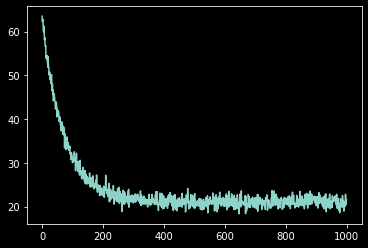

In [4]:
df.activity.plot()

In [5]:
with pm.Model() as model:
    # Put the model here.
    
    A = pm.HalfNormal('A',sd=100)
    tau = pm.Exponential('tau',lam=1)
    C = pm.Normal('C',sd=100)
    
    sd = pm.HalfCauchy('sd',beta=1)
    
    link = A * np.exp(- df['t'].values / tau) + C
    
    like = pm.Normal('activity', mu = link, sd=sd, observed= df['activity'].values)
    
    
    
    

In [7]:
with model: trace = pm.sample(2000,tune=2000)

<ipython-input-7-08c096c800bd>:1: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  with model: trace = pm.sample(2000,tune=2000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, C, tau, A]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 14 seconds.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


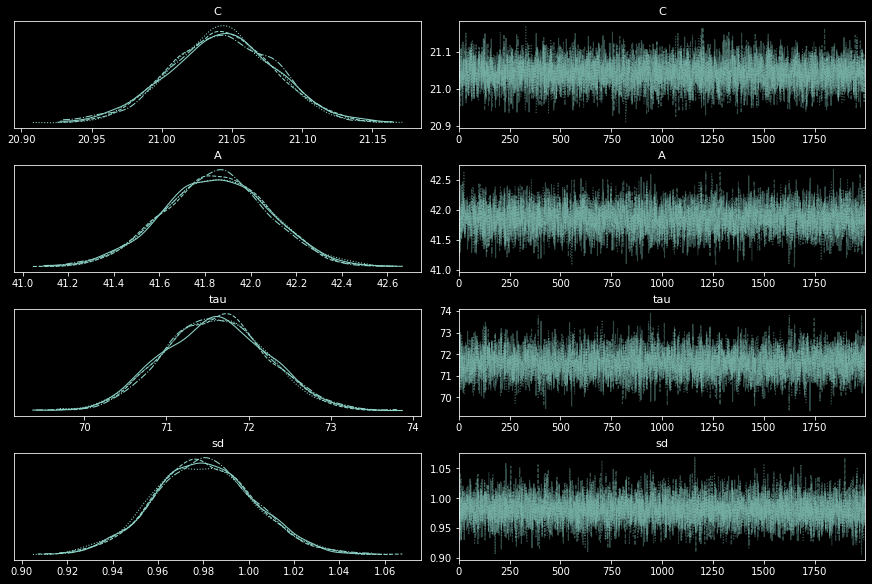

In [8]:
az.plot_trace(trace);

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


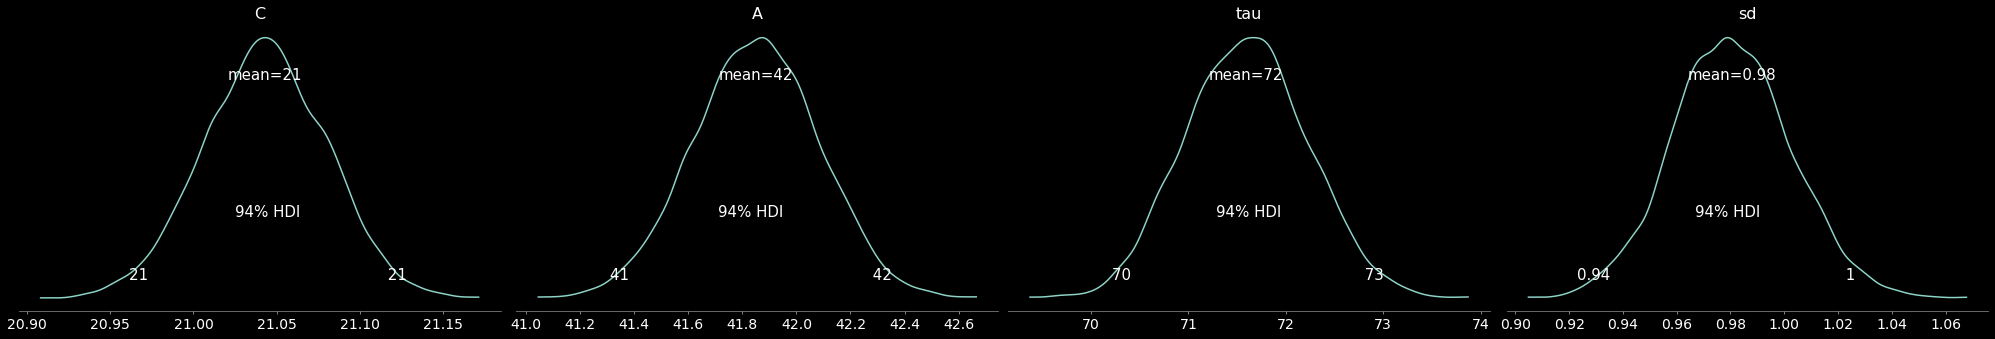

In [9]:
az.plot_posterior(trace);

In [ ]:
# # Constants for load_decay
# tau = 71.9 # indium decay half life
# A = 42  # starting magnitude
# C = 21 # measurement error
# noise_scale = 1

In [10]:
trace.varnames

['A_log__', 'tau_log__', 'C', 'sd_log__', 'A', 'tau', 'sd']

# Some link function 



- In lieu of showing you a "straight curve" (line) fit, you've now seen an arbitrary curve fit.
- As long as you can find a way to parameterize the curve with a function, you can perform inference on the curve's parameters.
- That function is called the "link function", which provides the link between the parameters, data and the output.

More generally, if

$$y = f(x, \theta)$$

where $\theta$ are merely a set of parameters, then you can perform inference on the curve's parameters $\theta$. To make this clear:

| curve name | functional form | parameters |
|------------|-----------------|---------------------|
| exponential decay | $y = Ae^{-t/\tau} + C$ | $A$, $\tau$, $C$|
| sine curves | $y = A\sin(\omega  x + \phi)$ | $A$, $\omega$, $\phi$ |
| linear regression | $y = mx + c$ | $m$, $c$ |
| logistic regression | $y = L(mx + c)$ | $m$, $c$ |
| 4-parameter IC50 | $y = \frac{a - i}{1 + 10^{\beta(log(\tau) - x)}} + i$ | $a$, $i$, $\tau$, $\beta$ |
| deep learning | $y = f(x, \theta)$ | $\theta$ |